# Name : Somya Dhar
# Id : 18-36396-1

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [3]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

x_train_norma = x_train.reshape(-1, 28,28,1)/ 255.0
x_test_norma = x_test.reshape(-1, 28,28,1)/ 255.0

In [4]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),

    layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                6416      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
model_adam=model
model_sgd=model
model_rmsprop=model

In [6]:
model_adam.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [7]:
model_sgd.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
model_rmsprop.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Without normalized data

In [9]:

h = model_adam.fit(x=x_train, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9159 - accuracy: 0.7469 - val_loss: 0.1788 - val_accuracy: 0.9517
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1419 - accuracy: 0.9605 - val_loss: 0.1134 - val_accuracy: 0.9682
Epoch 3/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0924 - accuracy: 0.9732 - val_loss: 0.0938 - val_accuracy: 0.9758
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0742 - accuracy: 0.9786 - val_loss: 0.0765 - val_accuracy: 0.9798
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0635 - accuracy: 0.9813 - val_loss: 0.0960 - val_accuracy: 0.9784


In [10]:
test_loss, test_acc = model_adam.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0811 - accuracy: 0.9802

Test accuracy: 0.9801999926567078


In [11]:
x = model_sgd.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0579 - accuracy: 0.9830 - val_loss: 0.0810 - val_accuracy: 0.9809
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0524 - accuracy: 0.9850 - val_loss: 0.0890 - val_accuracy: 0.9803
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0525 - accuracy: 0.9855 - val_loss: 0.0808 - val_accuracy: 0.9807
Epoch 4/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0506 - accuracy: 0.9868 - val_loss: 0.0986 - val_accuracy: 0.9800
Epoch 5/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0461 - accuracy: 0.9874 - val_loss: 0.1077 - val_accuracy: 0.9772


In [12]:
test_loss, test_acc = model_sgd.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0837 - accuracy: 0.9802

Test accuracy: 0.9801999926567078


In [13]:
y = model_rmsprop.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0470 - accuracy: 0.9872 - val_loss: 0.0946 - val_accuracy: 0.9797
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0422 - accuracy: 0.9880 - val_loss: 0.1282 - val_accuracy: 0.9776
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0423 - accuracy: 0.9885 - val_loss: 0.0901 - val_accuracy: 0.9805
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0431 - accuracy: 0.9882 - val_loss: 0.0950 - val_accuracy: 0.9828
Epoch 5/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0404 - accuracy: 0.9894 - val_loss: 0.0959 - val_accuracy: 0.9816


In [14]:
test_loss, test_acc = model_rmsprop.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0877 - accuracy: 0.9836

Test accuracy: 0.9836000204086304


### Adam vs SGD vs  RMSProp

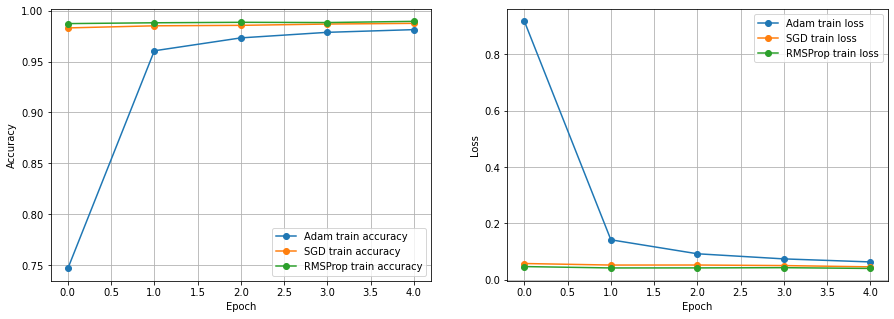

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(x.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(y.history['accuracy'], 'o-', label='RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='Adam train loss')
plt.plot(x.history['loss'], 'o-', label='SGD train loss')
plt.plot(y.history['loss'], 'o-', label='RMSProp train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Normalized data 

In [16]:
h_norma = model_adam.fit(x=x_train_norma, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3237 - accuracy: 0.9030 - val_loss: 0.0715 - val_accuracy: 0.9799
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0616 - accuracy: 0.9813 - val_loss: 0.0568 - val_accuracy: 0.9847
Epoch 3/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.0508 - val_accuracy: 0.9862
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0477 - val_accuracy: 0.9868
Epoch 5/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0482 - val_accuracy: 0.9862


In [17]:
test_loss, test_acc = model_adam.evaluate(x_test_norma, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9887

Test accuracy: 0.9886999726295471


### Normalized vs without Normalized data (adam)

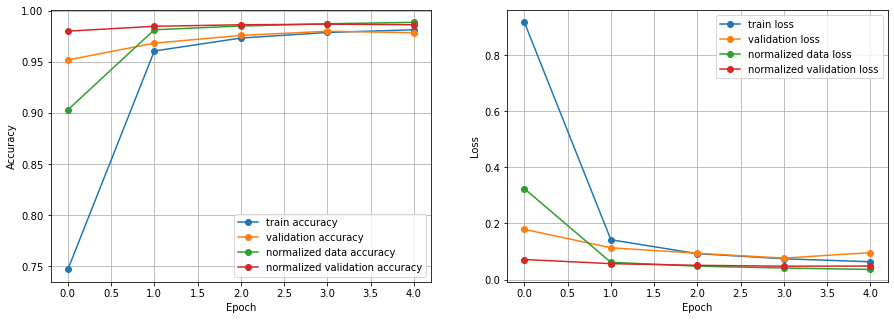

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(h_norma.history['accuracy'], 'o-', label = 'normalized data accuracy')
plt.plot(h_norma.history['val_accuracy'], 'o-', label = 'normalized validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.plot(h_norma.history['loss'], 'o-', label='normalized data loss')
plt.plot(h_norma.history['val_loss'], 'o-', label='normalized validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### Analyzing the affect of using and not using data normalization:

In [19]:
predictions = model_adam.predict(x_test)

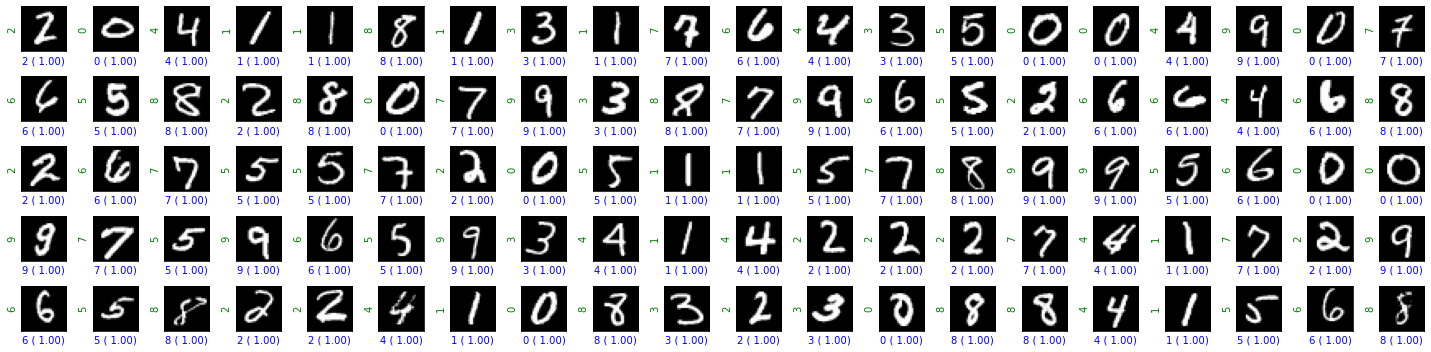

In [20]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model_adam.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()